In [1]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler

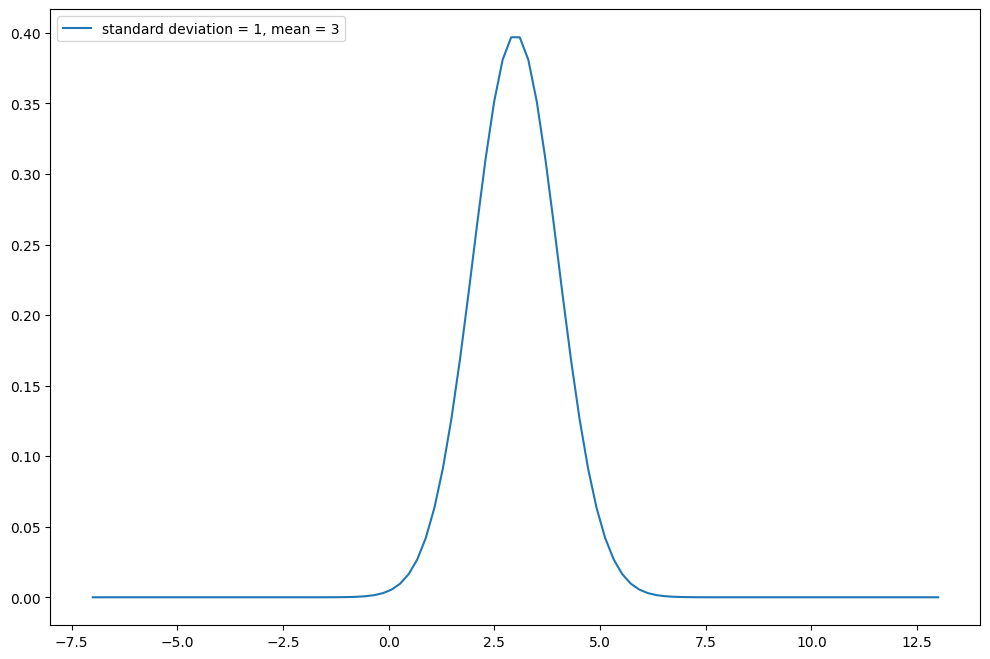

In [4]:
def gauss(x, sigma=1, mu=0):
    return stats.norm.pdf(x, mu, sigma)
x = np.linspace(-7, 13, 100)
plt.figure(figsize=(12, 8))
plt.plot(x, gauss(x, sigma=1, mu =3), label='standard deviation = 1, mean = 3')
plt.legend(loc='upper left')
plt.show()

In [5]:
y = gauss(x,sigma=1, mu =3)
print(y[40:60])
print(y.shape)
print(sum(y))
print(sum(y)/100)

[0.06325461 0.09132982 0.12659268 0.16845351 0.21519246 0.26390617
 0.31070449 0.35117292 0.38103951 0.39691225 0.39691225 0.38103951
 0.35117292 0.31070449 0.26390617 0.21519246 0.16845351 0.12659268
 0.09132982 0.06325461]
(100,)
4.949999999999998
0.04949999999999998


In [6]:
q0 = np.quantile(y, 0.0)
q1 = np.round(np.quantile(y, 0.25),decimals = 10)
q2 = np.round(np.quantile(y, 0.5) ,decimals = 10)
q3 = np.round(np.quantile(y, 0.75),decimals = 10)
q4 = np.round(np.quantile(y, 1.0) ,decimals = 10)
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {q2}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 7.69459862670642e-23
Q1: 0.0
Q2: 1.3002e-06
Q3: 0.0164506763
Q4: 0.3969122508


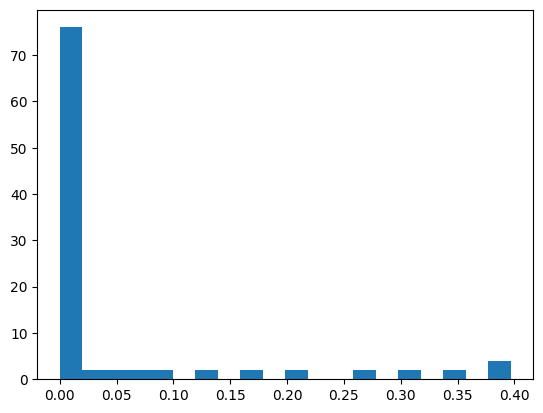

In [7]:
plt.hist(y, bins=20)
plt.show()

In [8]:
iqr = q3 - q1
print(iqr)

0.0164506763


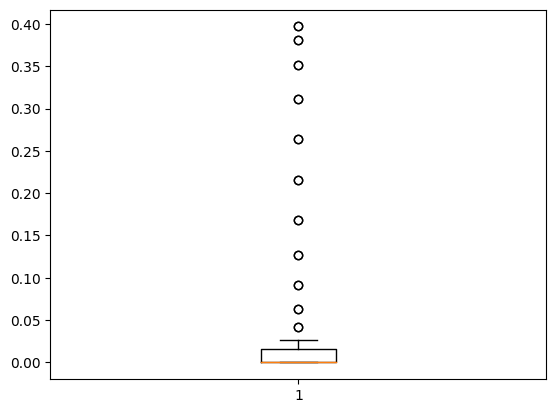

In [9]:
plt.boxplot(y)
plt.show()

In [16]:
mean_y= np.mean(y)
print(f'mean_y ={mean_y}')
median_y = np.median(y)
print(f'median_y = {median_y}')
mode_y = stats.mode(y,keepdims =False)
print(f'mode_y = {mode_y}')

mean_y =0.0495
median_y = 1.3001975364305877e-06
mode_y = ModeResult(mode=7.69459862670642e-23, count=2)


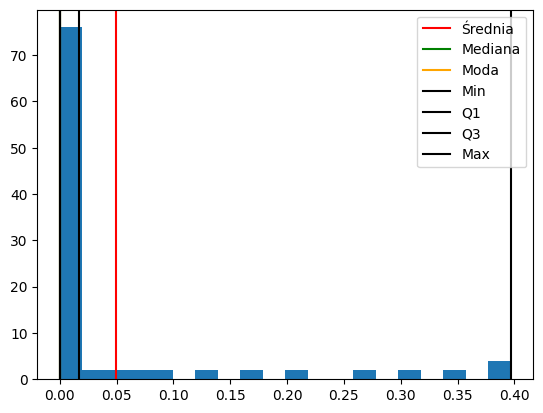

In [17]:
plt.hist(y, bins=20)
plt.axvline(x = mean_y, color='red', label = 'Średnia')
plt.axvline(x = median_y, color='green', label = 'Mediana')
plt.axvline(x = mode_y[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

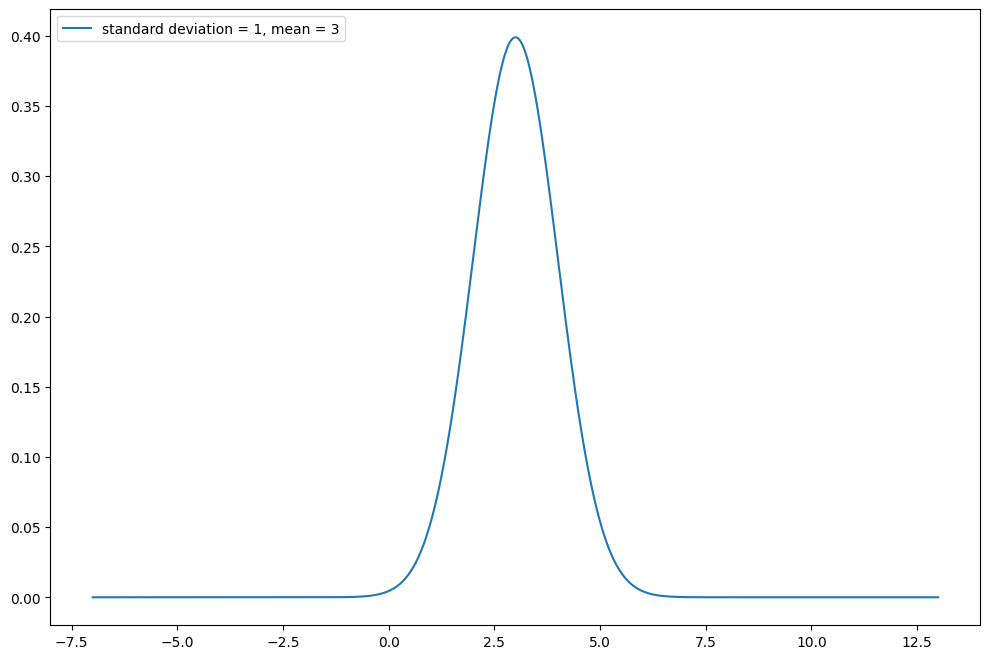

In [18]:
def gauss(x, sigma=1, mu=0):
    return stats.norm.pdf(x, mu, sigma)
x = np.linspace(-7, 13, 10000)
plt.figure(figsize=(12, 8))
plt.plot(x, gauss(x, sigma=1, mu =3), label='standard deviation = 1, mean = 3')
plt.legend(loc='upper left')
plt.show()

In [19]:
y = gauss(x,sigma=1, mu =3)
print(y[4980:5020])
print(y.shape)
print(sum(y))
print(sum(y)/10000)

[0.39863894 0.39866924 0.39869795 0.39872507 0.3987506  0.39877453
 0.39879686 0.39881761 0.39883675 0.39885431 0.39887026 0.39888463
 0.39889739 0.39890856 0.39891814 0.39892612 0.3989325  0.39893729
 0.39894048 0.39894208 0.39894208 0.39894048 0.39893729 0.3989325
 0.39892612 0.39891814 0.39890856 0.39889739 0.39888463 0.39887026
 0.39885431 0.39883675 0.39881761 0.39879686 0.39877453 0.3987506
 0.39872507 0.39869795 0.39866924 0.39863894]
(10000,)
499.94999999999857
0.04999499999999986


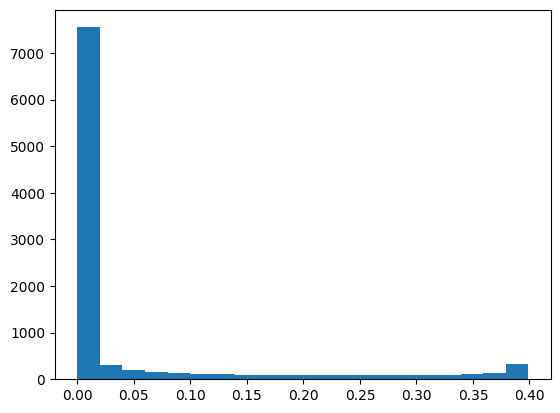

In [26]:
plt.hist(y, bins=20)
plt.show()

In [48]:
q0 = np.quantile(y, 0.0)
q1 = np.round(np.quantile(y, 0.25),decimals = 10)
q2 = np.round(np.quantile(y, 0.5) ,decimals = 10)
q3 = np.round(np.quantile(y, 0.75),decimals = 10)
q4 = np.round(np.quantile(y, 1.0) ,decimals = 10)
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {q2}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 7.69459862670642e-23
Q1: 0.0
Q2: 1.483e-06
Q3: 0.017495492
Q4: 0.3989420809


In [20]:
mean_y= np.mean(y)
print(f'mean_y ={mean_y}')
median_y = np.median(y)
print(f'median_y = {median_y}')
mode_y = stats.mode(y,keepdims =False)
print(f'mode_y = {mode_y}')

mean_y =0.04999500000000001
median_y = 1.4830246052546325e-06
mode_y = ModeResult(mode=7.69459862670642e-23, count=2)


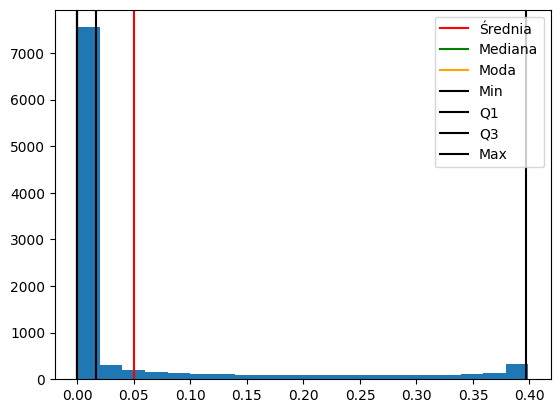

In [21]:
plt.hist(y, bins=20)
plt.axvline(x = mean_y, color='red', label = 'Średnia')
plt.axvline(x = median_y, color='green', label = 'Mediana')
plt.axvline(x = mode_y[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Dla 10000 obserwacji wykres y jest bardziej "wygładzony"